In [96]:
#Import the required the files

import numpy as np
import pandas as pd
import sklearn as sl
import seaborn as sns
import matplotlib.pyplot as plt


In [97]:
from seaborn import load_dataset

In [98]:
data=load_dataset("titanic")
print(data.keys())

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [99]:
data.shape

(891, 15)

In [100]:
print(data.keys())

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [101]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [102]:
#survived==alive
#pclass==class
#sex==who
#sibsp is related to alone
# check the relation between adult_male  to sex and age
# what is parch
#to whom fare is related to 
# what is embarked
# how embarkedis related to deck
# their is any relation between embark_town and servival


#####################################################data analysis#################################################################

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [103]:
data.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# Cleaning data

In [105]:
age_fill=data['age'].mode()
data=data.fillna({'age':age_fill[0]})

In [106]:
data=data.drop("deck",axis =1)


In [107]:
data=data.fillna({'embarked':data['embarked'].mode()[0]})
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [108]:
data=data.fillna({'embark_town':data['embark_town'].mode()[0]})
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

# Data Preprocessing

In [109]:
#####################################################EDA#########################################################
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [110]:
data.duplicated().sum() 

116

In [111]:
data.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
embark_town      object
alive            object
alone              bool
dtype: object

In [112]:
data.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.052872,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.356187,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.052872,-0.356187,1.000000,-0.232411,-0.155118,0.107554,0.232281,0.151002
sibsp,-0.035322,0.083081,-0.232411,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.155118,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.107554,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.232281,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.151002,-0.584471,-0.583398,-0.271832,0.404744,1.000000


<AxesSubplot:>

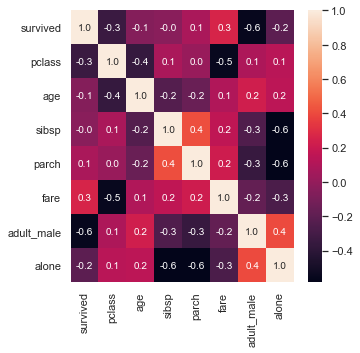

In [113]:
correlation_matrix=data.corr()
sns.heatmap(data=correlation_matrix, annot=True,annot_kws={"size": 10},fmt='.1f')

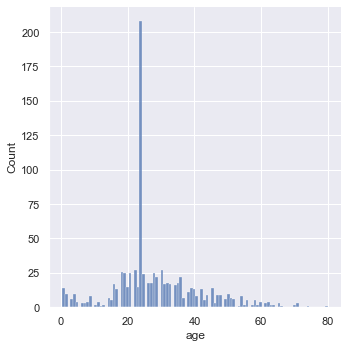

In [114]:
#########################################################EDA########################################################################
sns.set(rc={'figure.figsize':(1,1)})
sns.displot(data['age'],bins=100)
#age vary from new born to 80 years.
# and the large portion belong to the age between 20-40

<AxesSubplot:>

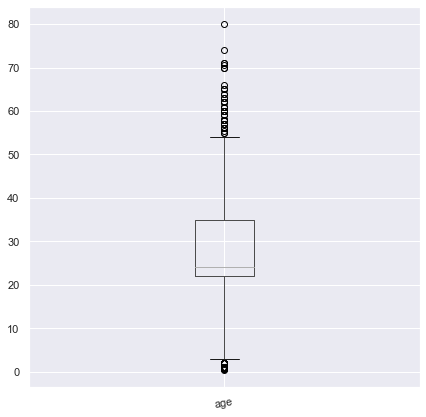

In [115]:
data.boxplot(column='age', rot=10, grid=True, figsize=(7,7), layout=None, return_type='axes', backend=None)

<AxesSubplot:>

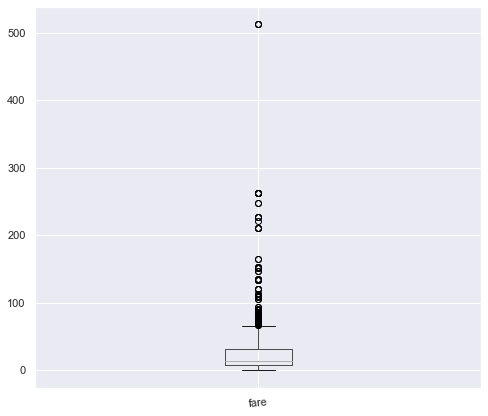

In [116]:
data.boxplot(column='fare',rot=5, grid=True, figsize=(8,7))

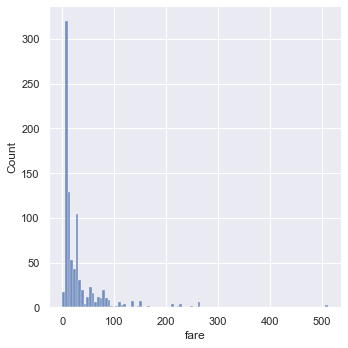

In [117]:
sns.set(rc={'figure.figsize':(10,10)})
sns.displot(data['fare'],bins=100)

D:\Users\abcd\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare', ylabel='Density'>

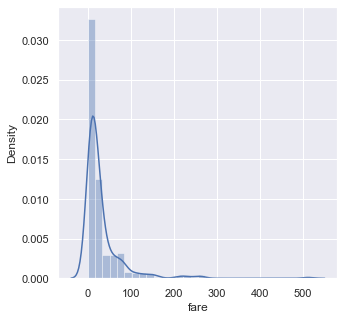

In [118]:

sns.set(rc={'figure.figsize':(5,5)})
sns.distplot(data['fare'],bins=30)

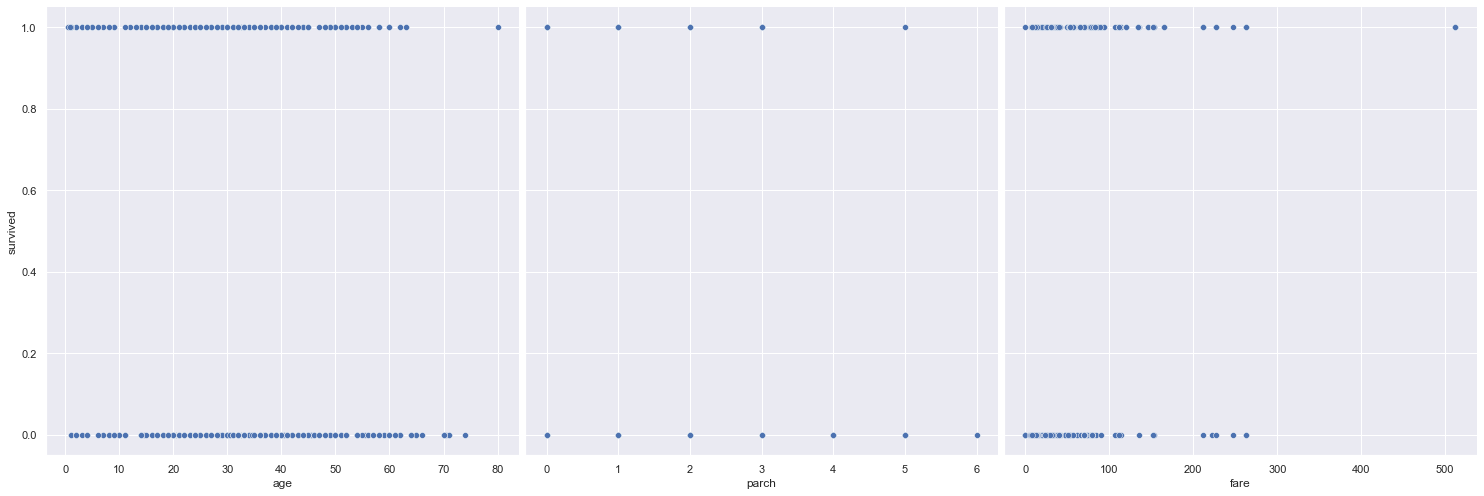

In [119]:
sns.pairplot(data,x_vars=['age','parch','fare',],y_vars='survived',height=7,kind='scatter')

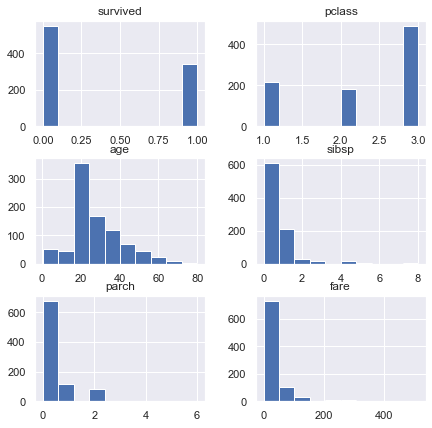

In [120]:
data.hist(figsize=(7,7))
plt.show()

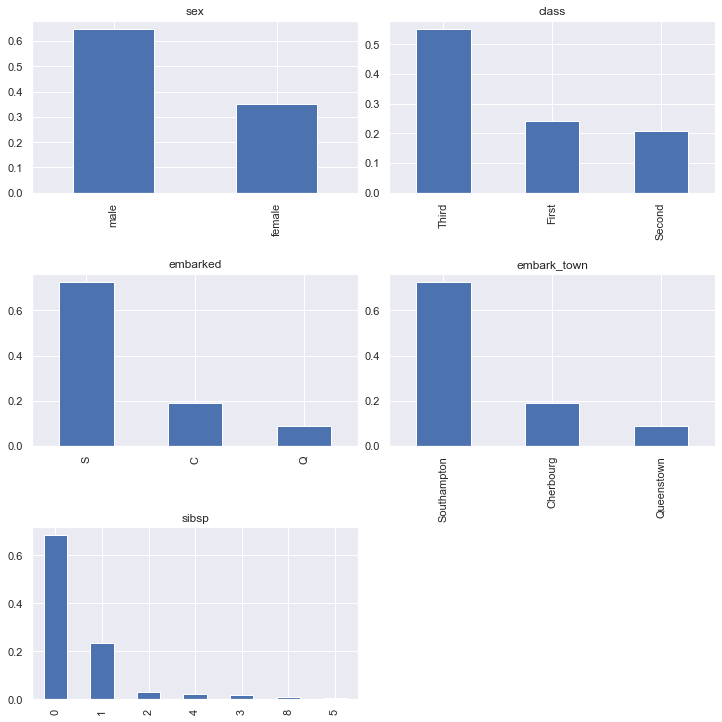

In [121]:
plt.subplot(321)
data["sex"].value_counts(normalize=True).plot(kind="bar",title="sex",figsize=(10,10))
plt.tight_layout(pad=0.5)
plt.subplot(322)
data["class"].value_counts(normalize=True).plot(kind="bar",title="class")
plt.tight_layout(pad=0.5)
plt.subplot(323)
data["embarked"].value_counts(normalize=True).plot(kind="bar",title="embarked")
plt.tight_layout(pad=0.5)
plt.subplot(324)
data["embark_town"].value_counts(normalize=True).plot(kind="bar",title="embark_town")
plt.tight_layout(pad=0.5)
plt.subplot(325)
data["sibsp"].value_counts(normalize=True).plot(kind="bar",title="sibsp")
plt.tight_layout(pad=0.5)

In [122]:
#feature engineering
data_new =data.drop(['class','embark_town','alive'],axis =1, inplace=False)
data_new.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
302,0,3,male,19.0,0,0,0.0000,S,man,True,True
14,0,3,female,14.0,0,0,7.8542,S,child,False,True
880,1,2,female,25.0,0,1,26.0000,S,woman,False,False
160,0,3,male,44.0,0,1,16.1000,S,man,True,False
131,0,3,male,20.0,0,0,7.0500,S,man,True,True


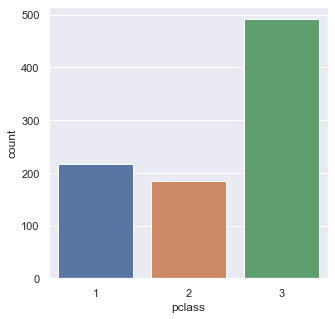

In [123]:
sns.countplot(data=data_new, x ='pclass')
plt.show()

In [124]:
#Categorical plot


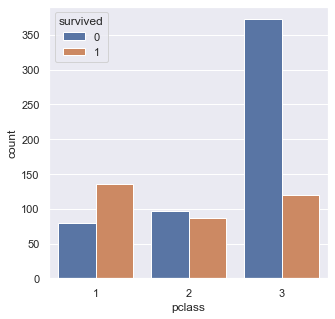

In [125]:
#compare the how survival depend upon the passenger class
sns.countplot(data=data_new,x ='pclass',hue='survived')
plt.show()

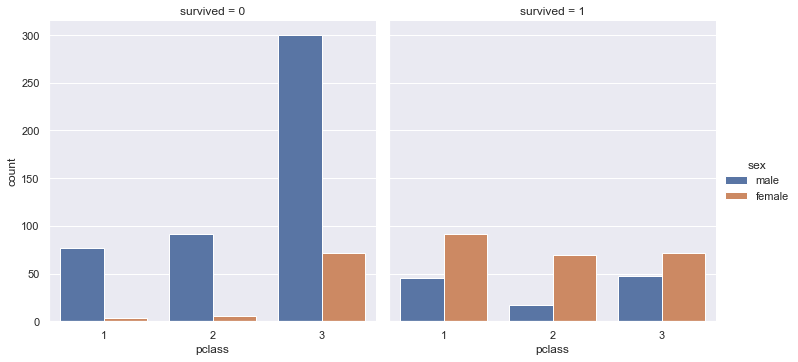

In [126]:
sns.catplot(data=data_new,x='pclass',hue='sex',col='survived',kind='count')


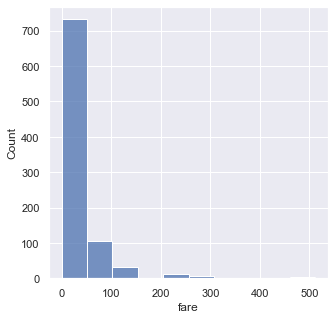

In [127]:
sns.histplot(data=data_new,x='fare',bins=10)
plt.show()

<AxesSubplot:xlabel='pclass', ylabel='age'>

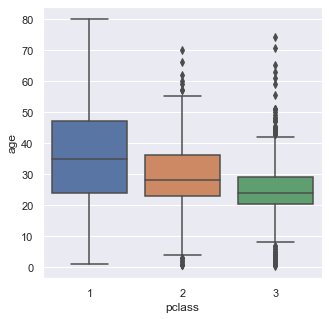

In [128]:
sns.boxplot(x='pclass',y='age',data=data_new)

In [129]:
who=pd.get_dummies(data_new['who'])
who.drop(['child'],axis=1,inplace=True)

In [130]:
who.sample(5)

,man,woman
269,0,1
471,1,0
558,0,1
485,0,1
16,0,0


In [131]:
embarked=pd.get_dummies(data_new['embarked'])
embarked.drop(['S'],axis=1,inplace=True)

In [132]:
embarked.sample(5)

,C,Q
22,0,1
570,0,0
777,0,0
228,0,0
233,0,0


In [133]:
data_version2= pd.concat([who,embarked,data_new],axis=1)

In [134]:
data_version2.sample(3)

,man,woman,C,Q,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
69,1,0,0,0,0,3,male,26.0,2,0,8.6625,S,man,True,False
579,1,0,0,0,1,3,male,32.0,0,0,7.9250,S,man,True,True
5,1,0,0,1,0,3,male,24.0,0,0,8.4583,Q,man,True,True


In [135]:
data_version2.drop(['sex','embarked','adult_male','alone','who'],axis=1,inplace=True)

In [136]:
data_version2.sample(3)

,man,woman,C,Q,survived,pclass,age,sibsp,parch,fare
93,1,0,0,0,0,3,26.0,1,2,20.5750
783,1,0,0,0,0,3,24.0,1,2,23.4500
629,1,0,0,1,0,3,24.0,0,0,7.7333


# MOdelling and prediction

In [137]:
X=data_version2.drop(["survived"],axis=1)

In [138]:
y= data_version2["survived"]

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [140]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

In [141]:
st=StandardScaler()

In [142]:
X_train=st.fit_transform(X_train)

In [143]:
X_test=st.transform(X_test)

In [144]:
X_test



array([[ 0.80778703, -0.64241607,  2.15954541, ...,  0.34868694,
         0.75976322, -0.32547755],
       [ 0.80778703, -0.64241607, -0.46306042, ..., -0.47416141,
        -0.47932706, -0.41855727],
       [ 0.80778703, -0.64241607, -0.46306042, ..., -0.47416141,
        -0.47932706, -0.46906094],
       ...,
       [ 0.80778703, -0.64241607, -0.46306042, ..., -0.47416141,
        -0.47932706, -0.10376746],
       [ 0.80778703, -0.64241607, -0.46306042, ..., -0.47416141,
        -0.47932706, -0.45459629],
       [ 0.80778703, -0.64241607, -0.46306042, ..., -0.47416141,
        -0.47932706, -0.10376746]])

In [145]:
X_train

array([[-1.23795005, -0.64241607, -0.46306042, ..., -0.47416141,
         1.99885349,  0.98099823],
       [ 0.80778703, -0.64241607, -0.46306042, ..., -0.47416141,
        -0.47932706, -0.46963364],
       [-1.23795005, -0.64241607, -0.46306042, ...,  0.34868694,
         0.75976322, -0.40613632],
       ...,
       [ 0.80778703, -0.64241607, -0.46306042, ...,  1.17153529,
        -0.47932706, -0.34778742],
       [-1.23795005, -0.64241607, -0.46306042, ...,  0.34868694,
         1.99885349,  1.72907416],
       [ 0.80778703, -0.64241607, -0.46306042, ..., -0.47416141,
         0.75976322,  0.8913508 ]])

In [146]:
from sklearn.linear_model import LogisticRegression

In [147]:
lr=LogisticRegression()

In [148]:
lr.fit(X_train,y_train)

LogisticRegression()

In [149]:
preds=lr.predict(X_test)

# Evaluation


In [150]:
from sklearn.metrics import classification_report

In [151]:
target_names =['class 0' ,'class 1']
print(classification_report(y_test,preds,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.82      0.87      0.84       157
     class 1       0.79      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [152]:
from sklearn.metrics import confusion_matrix

In [153]:
confusion_matrix(y_test,preds)

array([[136,  21],
       [ 30,  81]], dtype=int64)

In [154]:
from sklearn.metrics import accuracy_score

In [155]:
accuracy_score(y_test,preds)

0.8097014925373134

In [158]:
y_PredProb= lr.predict_proba(X_test)[::,1]
y_PredProb


array([0.0782658 , 0.17421104, 0.08877999, 0.83015393, 0.72349617,
       0.93974174, 0.72453826, 0.04217487, 0.73816537, 0.88943285,
       0.26530164, 0.07335609, 0.32731506, 0.13515211, 0.16942499,
       0.91842493, 0.25653242, 0.72459971, 0.18069174, 0.33725642,
       0.08600489, 0.34034348, 0.59429924, 0.08918971, 0.08804477,
       0.29173129, 0.4632325 , 0.17561372, 0.30259654, 0.6707876 ,
       0.08947473, 0.68769912, 0.500742  , 0.68379438, 0.09023287,
       0.09655786, 0.36009734, 0.72453826, 0.95640145, 0.08600489,
       0.10982769, 0.05498622, 0.08605203, 0.10257418, 0.71478703,
       0.0322129 , 0.0895579 , 0.08709898, 0.08574676, 0.38009719,
       0.59336028, 0.86821519, 0.01993596, 0.8855751 , 0.07416114,
       0.9089689 , 0.17296712, 0.97061221, 0.83006603, 0.73320479,
       0.08803418, 0.81359423, 0.77420275, 0.35951205, 0.10257418,
       0.79486584, 0.22715762, 0.08265127, 0.08042289, 0.93383301,
       0.72916121, 0.93734068, 0.49573027, 0.92551071, 0.08667

In [159]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test, y_PredProb)

In [162]:
auc = metrics.roc_auc_score(y_test,  y_PredProb)
print(auc)

0.8766282205772652


In [165]:
help( metrics.roc_curve)

Help on function roc_curve in module sklearn.metrics._ranking:

roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)
    Compute Receiver operating characteristic (ROC).
    
    Note: this implementation is restricted to the binary classification task.
    
    Read more in the :ref:`User Guide <roc_metrics>`.
    
    Parameters
    ----------
    y_true : ndarray of shape (n_samples,)
        True binary labels. If labels are not either {-1, 1} or {0, 1}, then
        pos_label should be explicitly given.
    
    y_score : ndarray of shape (n_samples,)
        Target scores, can either be probability estimates of the positive
        class, confidence values, or non-thresholded measure of decisions
        (as returned by "decision_function" on some classifiers).
    
    pos_label : int or str, default=None
        The label of the positive class.
        When ``pos_label=None``, if `y_true` is in {-1, 1} or {0, 1},
        ``pos_label`` is set

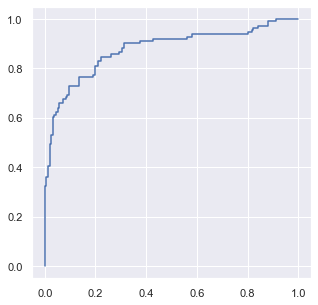

In [169]:
plt.plot(fpr,tpr)

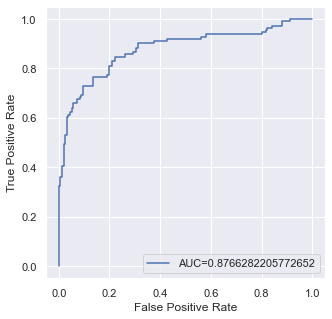

In [171]:
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)

In [173]:
X_test=[[4,1,2,1,0,1,0,0,1]]
y_pred_prob = lr.predict_proba(X_test)
y_pred_prob
#predictions=lr.predict(X_test)
#predictions

array([[0.99800184, 0.00199816]])

In [174]:
predictions=lr.predict(X_test)
predictions

array([0], dtype=int64)